In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv("PrePlacementdata.csv")
dataset.isna().sum()

Unnamed: 0        0
sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [4]:

import seaborn as sns
dataset

,Unnamed: 0,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,211,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,212,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,213,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


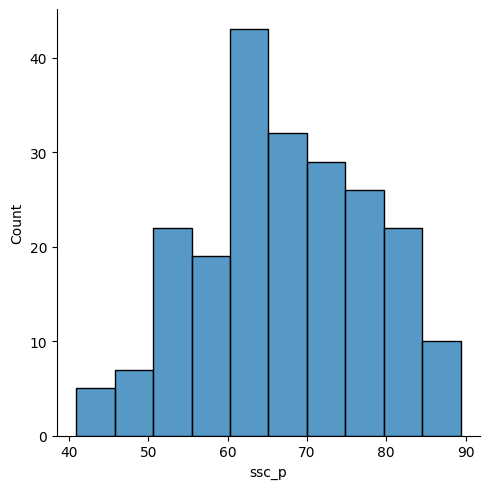

In [5]:
sns.displot(dataset["ssc_p"])

In [6]:
def get_pdf_probability(dataset, start_range, end_range):
    from matplotlib import pyplot as plt
    from scipy.stats import norm
    import seaborn as sns
    import numpy as np

    mean = dataset.mean()
    std = dataset.std()

    print(f"Mean = {mean:.3f}, Standard Deviation = {std:.3f}")

    # Histogram + KDE
    sns.histplot(
        dataset,
        kde=True,
        stat="density",
        color="green",
        line_kws={"color": "red"}  # KDE color
    )

    # Normal curve
    x = np.linspace(dataset.min(), dataset.max(), 1000)
    y = norm(mean, std).pdf(x)
    plt.plot(x, y)

    # Shade area
    x_fill = np.linspace(start_range, end_range, 300)
    plt.fill_between(x_fill, norm(mean, std).pdf(x_fill), alpha=0.4)

    plt.axvline(start_range)
    plt.axvline(end_range)
    plt.show()

    prob = norm(mean, std).cdf(end_range) - norm(mean, std).cdf(start_range)
    print(f"Probability between {start_range} and {end_range}: {prob}")

    return prob


Mean = 67.303, Standard Deviation = 10.827


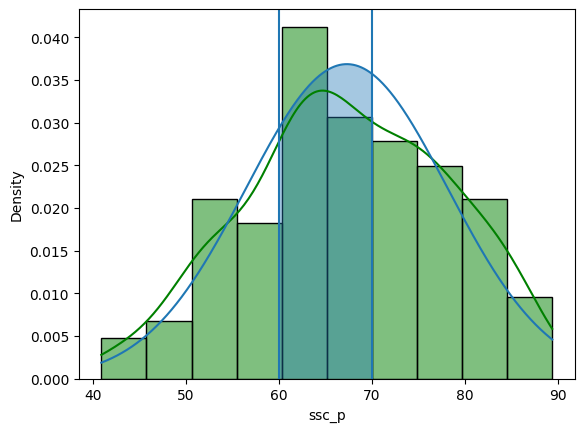

Probability between 60 and 70: 0.34835845838786206


np.float64(0.34835845838786206)

In [7]:
get_pdf_probability(dataset['ssc_p'], 60,70)

Mean = 67.303, Standard Deviation = 10.827


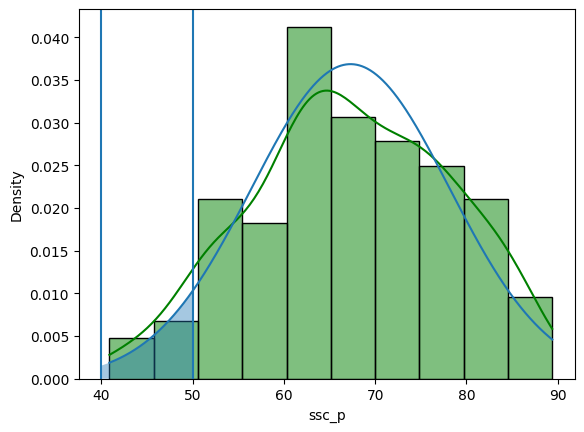

Probability between 40 and 50: 0.04916705533695259


np.float64(0.04916705533695259)

In [8]:
get_pdf_probability(dataset['ssc_p'], 40,50)

Mean = 67.303, Standard Deviation = 10.827


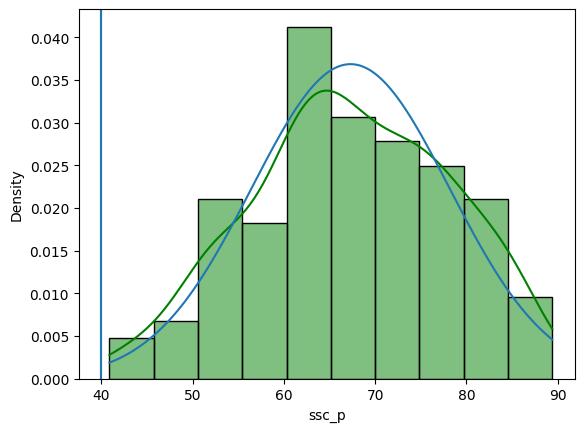

Probability between 40 and 40: 0.0


np.float64(0.0)

In [9]:
get_pdf_probability(dataset['ssc_p'], 40,40)

In [10]:
#Cumulative density function

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['ssc_p'])
ecdf(80)

np.float64(0.8651162790697674)

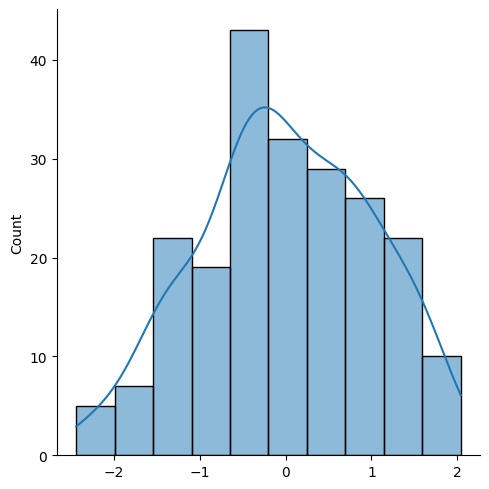

In [18]:
 # Coverted to standard Normal Distribution

def stdNBgraph(dataset):
    # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.displot(z_score,kde=True)

    sum(z_score)/len(z_score)
    #z_score.std()

stdNBgraph(dataset['ssc_p'])

(np.float64(-4.626789907275071e-16), np.float64(0.9999999999999999))

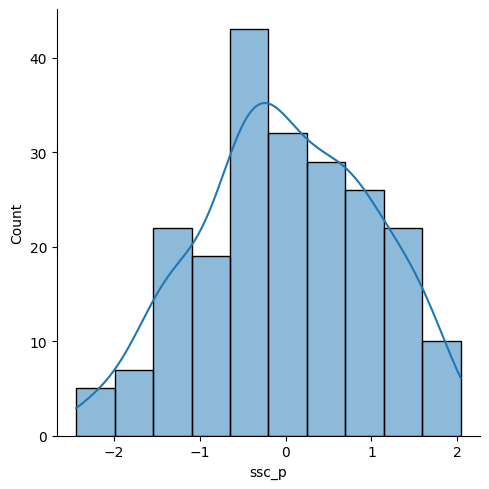

In [19]:
#ptimized Code
def OptimizedstdNBgraph(dataset):
    import seaborn as sns

    z_score = (dataset - dataset.mean()) / dataset.std()
    sns.displot(z_score, kde=True)

    return z_score.mean(), z_score.std()

OptimizedstdNBgraph(dataset['ssc_p'])